In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
dataset = pd.read_csv('diamonds.csv')

In [11]:
dataset 

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [12]:
dataset.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [13]:
dataset.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [14]:
dataset.tail(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [15]:
dataset.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [16]:
dataset.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [17]:
dataset.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [18]:
dataset['cut'] = dataset.cut.map({'Ideal':1,'Premium':2, 'Good':3, 'Very Good':4, 'Fair':5})

In [19]:
dataset['color'] = dataset.color.map({'E':1,'I':2, 'J':3, 'H':4, 'F':5, 'G':6, 'D':7})

In [20]:
dataset['clarity'] = dataset.clarity.map({'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8})

In [21]:
dataset.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.228940,4.174416,3.256136,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.265976,2.050156,1.766539,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,5.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,6.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [22]:
corr = round(dataset.corr(), 4)
corr.style.background_gradient()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.114400,-0.065400,-0.281200,0.028200,0.181600,0.921600,0.975100,0.951700,0.953400
cut,0.114400,1.000000,-0.029100,-0.118700,0.169900,0.382000,0.049400,0.105400,0.105300,0.126700
color,-0.065400,-0.029100,1.000000,0.032600,-0.001700,-0.034000,-0.016600,-0.055300,-0.054800,-0.055700
clarity,-0.281200,-0.118700,0.032600,1.000000,-0.025900,-0.133700,-0.140300,-0.305900,-0.297000,-0.300000
depth,0.028200,0.169900,-0.001700,-0.025900,1.000000,-0.295800,-0.010600,-0.025300,-0.029300,0.094900
table,0.181600,0.382000,-0.034000,-0.133700,-0.295800,1.000000,0.127100,0.195300,0.183800,0.150900
price,0.921600,0.049400,-0.016600,-0.140300,-0.010600,0.127100,1.000000,0.884400,0.865400,0.861200
x,0.975100,0.105400,-0.055300,-0.305900,-0.025300,0.195300,0.884400,1.000000,0.974700,0.970800
y,0.951700,0.105300,-0.054800,-0.297000,-0.029300,0.183800,0.865400,0.974700,1.000000,0.952000
z,0.953400,0.126700,-0.055700,-0.300000,0.094900,0.150900,0.861200,0.970800,0.952000,1.000000


<Axes: >

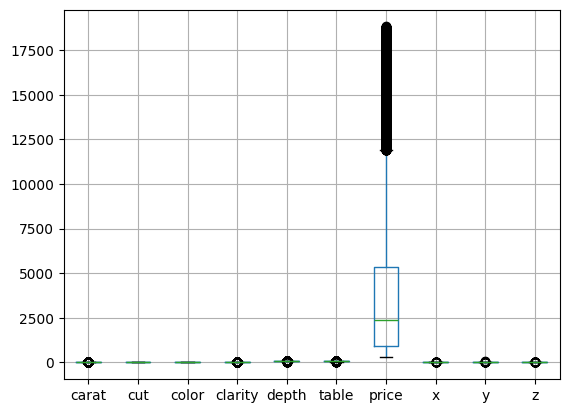

In [23]:
dataset.boxplot()

In [24]:
data_x = dataset.drop(['cut'], axis='columns')
data_y = dataset.cut

In [25]:
model_tree =  DecisionTreeClassifier()

In [26]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size= 0.1)

In [27]:
model_tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [28]:
y_predicted = model_tree.predict(test_x)

In [29]:
print(f'Score: {round(model_tree.score(test_x, test_y), 4) * 100}%')


Score: 70.41%


In [30]:
print(f'Score: {round(model_tree.score(train_x, train_y), 4) * 100}%')

Score: 99.99%


In [31]:
from sklearn import tree

In [32]:
tree.plot_tree(model_tree)
plt.show()

KeyboardInterrupt: 

Humanización de los datos

In [33]:
def classify_price(model, carat, color,	clarity, depth,	table, price, x,	y,	z):
  result = model.predict([[carat, color,	clarity, depth,	table, price, x,	y,	z]])
  print(f'El diamante con los siguientes datos: \n *Peso del diamante en kilate: {carat}kt \n *Color del diamante: {list_color[color]} \n *Claridad del diamante: {list_clarity[clarity]} \n *Profundidad del diamante: {depth} \n *Tamaño de la mesa del diamante: {table} \n *Precio del diamante: {price}  \n *Largo del diamante: {x} \n *Ancho del diamante: {y} \n *Alto del diamante: {z} \n *Tiene un corte de: {result[0]} ')

In [34]:
list_color = ['None', 'E', 'I', 'J', 'H', 'F', 'G', 'D']
list_clarity = ['None', 'SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

In [35]:
carat = 0.78
table = 15.0
color = 5
clarity = 1
depth = 62.4
price = 335
x = 5.79
y = 1.20
z = 6.49

In [36]:
classify_price(model_tree, carat, color, clarity, depth, table, price, x, y, z)

El diamante con los siguientes datos: 
 *Peso del diamante en kilate: 0.78kt 
 *Color del diamante: F 
 *Claridad del diamante: SI2 
 *Profundidad del diamante: 62.4 
 *Tamaño de la mesa del diamante: 15.0 
 *Precio del diamante: 335  
 *Largo del diamante: 5.79 
 *Ancho del diamante: 1.2 
 *Alto del diamante: 6.49 
 *Tiene un corte de: 5 


c:\Users\Usuario\LOURDES_c\NUR\AlgoritmicaAvanzada\avance-personal\entornos\proyecto_tres\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
